In [1]:
import tensorflow as tf
import keras as keras
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


/home/drg/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/drg/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/drg/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/drg/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarnin

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [3]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)


(50000, 32, 32, 3) (10000, 32, 32, 3) (50000, 1) (10000, 1)


In [4]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


In [5]:
print(y_train[0])

[6]


In [6]:
class_names = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

In [7]:
y_train[1]
class_names[y_train[1]]


array(['truck'], dtype='<U10')

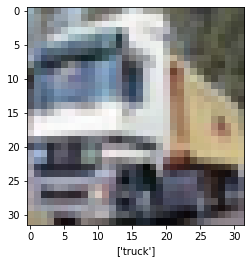

In [8]:
plt.figure()
plt.imshow(x_train[1])
plt.xlabel(class_names[y_train[1]])
plt.show()

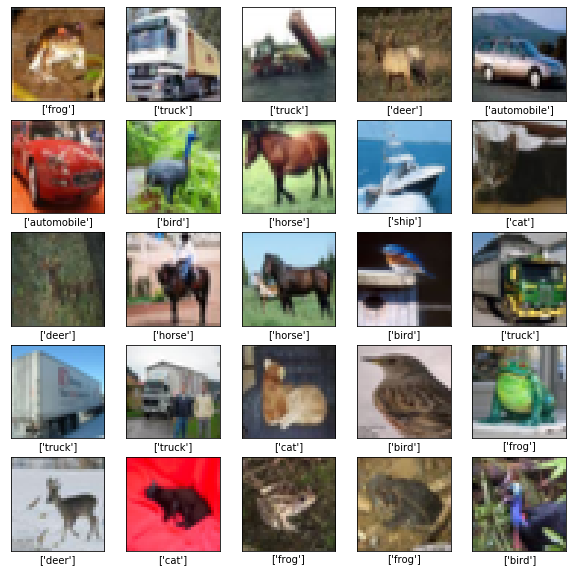

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [10]:
#now time to prepare data
#normalize x
keras.backend.image_data_format()

'channels_last'

In [11]:
img_rows = x_train.shape[1]
img_cols = x_train.shape[2]
input_shape = (img_rows, img_cols, 3)

num_classes = len(np.unique(y_train))

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train/255
x_test = x_test/255

print(input_shape,num_classes)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

(32, 32, 3) 10
(50000, 32, 32, 3) (50000, 10) (10000, 32, 32, 3) (10000, 10)


In [12]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(5,5),padding='same',input_shape=input_shape))
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(5,5),activation='relu'))
model.add(keras.layers.MaxPool2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(1024,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))


In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)             

In [14]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])


In [15]:
history = model.fit(x_train,y_train,epochs=4,verbose=1,batch_size=32,validation_data=(x_test,y_test),shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 93s 2ms/step - loss: 1.4410 - accuracy: 0.4811 - val_loss: 1.2874 - val_accuracy: 0.5432
Epoch 2/4
50000/50000 [==============================] - 93s 2ms/step - loss: 1.0910 - accuracy: 0.6121 - val_loss: 1.0423 - val_accuracy: 0.6318
Epoch 3/4
50000/50000 [==============================] - 93s 2ms/step - loss: 0.9112 - accuracy: 0.6822 - val_loss: 0.9887 - val_accuracy: 0.6528
Epoch 4/4
50000/50000 [==============================] - 93s 2ms/step - loss: 0.7632 - accuracy: 0.7340 - val_loss: 0.9540 - val_accuracy: 0.6726


In [16]:
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print(test_loss,test_acc)

0.9539576933860778 0.6725999712944031


In [17]:
y_pred = model.predict(x_test)
print(y_pred[0],np.argmax(y_pred[0]),y_test[0],np.argmax(y_test[0]))

[6.0653826e-04 2.9797147e-03 2.7641796e-03 7.7990657e-01 2.4321172e-04
 1.9358194e-01 4.6542883e-03 7.9046347e-04 1.2908745e-02 1.5643932e-03] 3 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] 3


In [18]:
def print_pred(i):
    plt.imshow(x_test[i])
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel( "Pred {} - Real {} - Accuracy{:2.0f}%".format(class_names[np.argmax(y_pred[i])],class_names[np.argmax(y_test[i])],100*np.max(y_pred[i])),color=color )
    #plt.xlabel( str(np.argmax(y_pred[i])) + ' - ' + str(np.argmax(y_test[i])),color=color )
    plt.show()

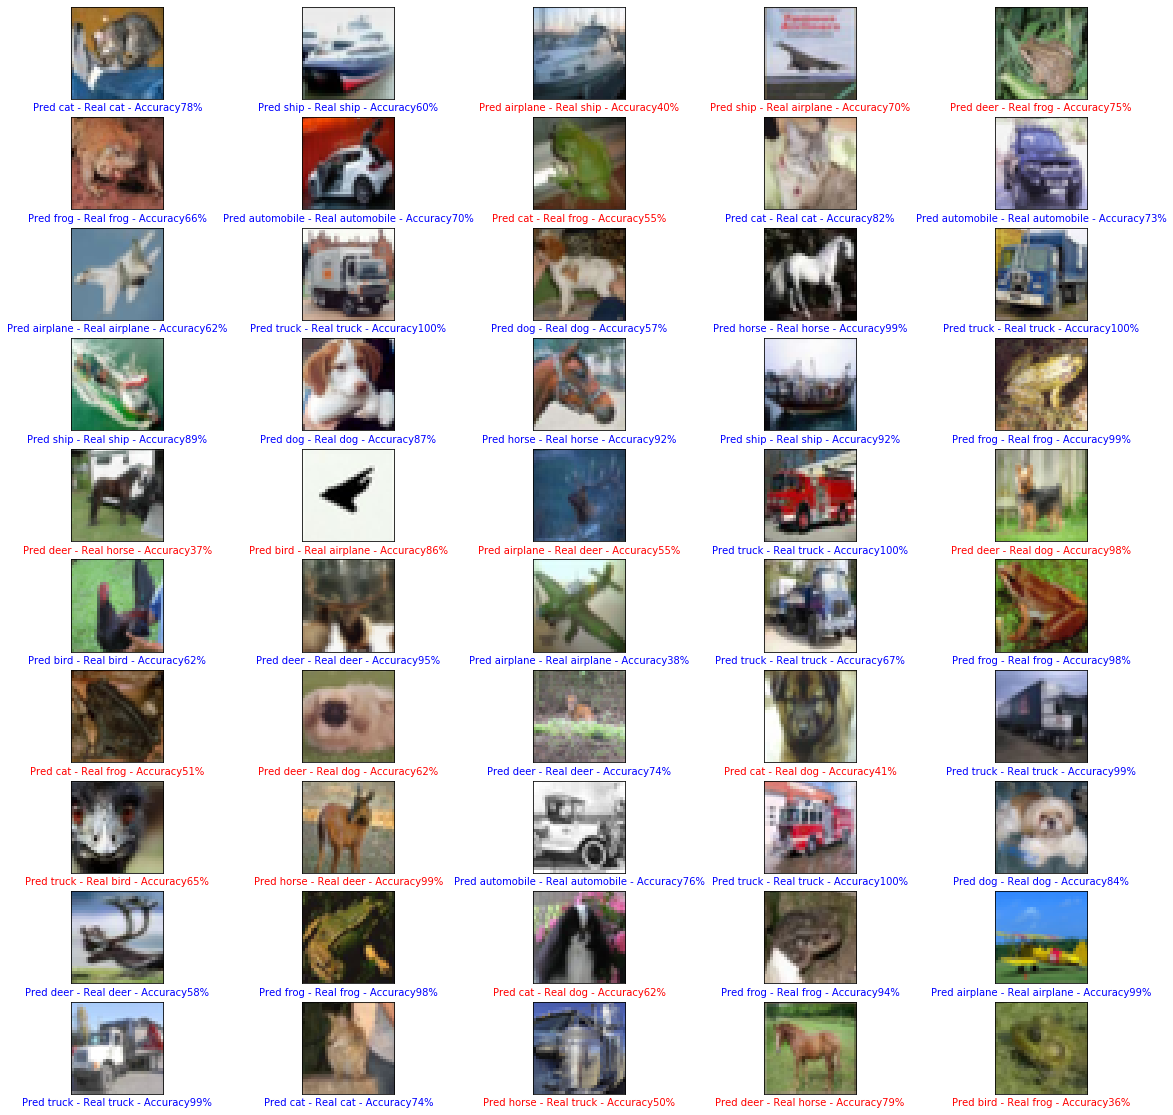

In [27]:

plt.figure(figsize=(20,20))
for i in range(50):
    
    plt.subplot(10,5,i+1)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(x_test[i])
    if(np.argmax(y_pred[i]) == np.argmax(y_test[i])):
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel( "Pred {} - Real {} - Accuracy{:2.0f}%".format(class_names[np.argmax(y_pred[i])],class_names[np.argmax(y_test[i])],100*np.max(y_pred[i])),color=color )

plt.show()
